In [1]:
#import the necessary modules 
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy
import sklearn
import itertools 
from itertools import cycle 
import os.path as op
import timeit 
import json
import math


In [2]:
import multiprocessing as m_proc
m_proc.cpu_count()

4

In [3]:
# Import MDAnalysis
import MDAnalysis as mda
import statsmodels as stats
from MDAnalysis.analysis import polymer, distances, rdf
import matplotlib.font_manager as font_manager

In [4]:
from polymer_MD_analysis import pers_length, get_rg_pers_poly, bavg_pers_cnt

## PEG/water systems analysis

### N = 6

In [5]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n6_peg_wat = mda.Universe("n6peg_prod/n6pegonly.pdb", "n6peg_prod/nowat_n6peg.xtc")

In [6]:
n6_peg_wat.trajectory

<XTCReader n6peg_prod/nowat_n6peg.xtc with 18001 frames of 45 atoms>

In [7]:
len(n6_peg_wat.trajectory)

18001

In [8]:
#Select the polymer heavy atoms 
peg_n6 = n6_peg_wat.select_atoms("resname sPEG PEG tPEG and not type H")

In [9]:
crv_n6peg = pers_length(peg_n6,6)
crv_n6peg

array([[ 1.        ,  0.99378211,  0.99457237,  0.98859888,  0.98142095],
       [ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ],
       [ 0.        ,  0.        ,  0.        ,  8.66014075, 11.06175726]])

In [10]:
com_bond = np.zeros(shape=(1,18000))
count = 0
for ts in n6_peg_wat.trajectory[0:18000]:
    n6_mon1 = n6_peg_wat.select_atoms("resid 1")
    n6_mon2 = n6_peg_wat.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n6_mon1.center_of_mass(), n6_mon2.center_of_mass(), 
                                                   box=n6_peg_wat.trajectory.ts.dimensions)
    com_bond[0, count] = oo_len
    count += 1
    

In [11]:
com_bond

array([[3.62684519, 3.32616194, 3.18436942, ..., 3.19787102, 3.21162118,
        3.35360062]])

In [12]:
lb_avg_pn6 = np.mean(com_bond)
lb_avg_pn6

3.2416426844376756

In [13]:
np.std(com_bond)

0.15150696554795434

### Radius of Gyration vs. time N = 6 PEG/water

In [14]:
n6peg_rgens, cor_n6peg, N6peg_cos, rgavg_n6peg = get_rg_pers_poly(peg_n6, n6_peg_wat, 0, 18000)

In [15]:
n6peg_rgens[0].shape

(18000,)

In [16]:
cor_n6peg[3]

array([0., 1., 2., 3., 4.])

In [17]:
N6peg_cos

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.99378211, 0.91799677, 0.89854826, ..., 0.87736113, 0.89235406,
        0.90408813],
       [0.99457237, 0.84931367, 0.80468613, ..., 0.63670978, 0.65655909,
        0.65512385],
       [0.98859888, 0.84598067, 0.73230691, ..., 0.41959792, 0.32938704,
        0.34754323],
       [0.98142095, 0.91715453, 0.87172716, ..., 0.33515925, 0.05285464,
        0.13065741]])

In [18]:
rgavg_n6peg

4.422972260785161

In [19]:
np.std(n6peg_rgens)

0.5239522076018993

In [20]:
trj_len = np.arange(18000)

#trj_len += 1
trj_len


array([    0,     1,     2, ..., 17997, 17998, 17999])

(0.2, 2)

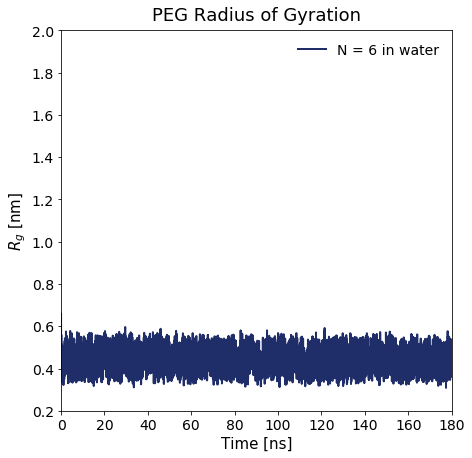

In [21]:
plt.figure(figsize=(7,7))
plt.title(r'PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6peg_rgens[0]/10,linewidth=2, color='#1F2E69')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in water'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,2)

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 6 PEG/water 

In [22]:
np.arange(5, dtype=float)

array([0., 1., 2., 3., 4.])

In [23]:
# x values
blen = cor_n6peg[3]*lb_avg_pn6
#nt_tt[0] = 0
blen

array([ 0.        ,  3.24164268,  6.48328537,  9.72492805, 12.96657074])

In [24]:
mk_n6p = cor_n6peg[1]/cor_n6peg[0]
mk_n6p

array([5.61855246e-17, 3.37731550e-02, 1.52618066e-01, 4.54247930e-01,
       9.81624270e-01])

<ErrorbarContainer object of 3 artists>

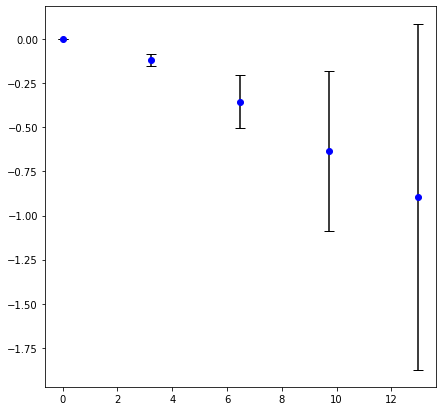

In [25]:
plt.figure(figsize=(7,7))
plt.errorbar(blen, np.log(cor_n6peg[0]), yerr=mk_n6p, color='b', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [26]:
# All the points give the best fits for N = 6 peg in water
n6_blkspeg , n6peg_fitslp = bavg_pers_cnt(5, peg_n6, n6_peg_wat, lb_avg_pn6, 5, 3000 , 18000)

3000
6000
Lp [Angstroms]: 17.677850244635312
Error in Lp from fit [Angstroms], 95% CL: 3.1757034291771906
R2 score: 0.982057034856551
6000
9000
Lp [Angstroms]: 15.26811735376146
Error in Lp from fit [Angstroms], 95% CL: 3.544531838825881
R2 score: 0.9713604689468842
9000
12000
Lp [Angstroms]: 13.857661368714624
Error in Lp from fit [Angstroms], 95% CL: 3.949122340271953
R2 score: 0.9587192292202948
12000
15000
Lp [Angstroms]: 16.27604531409899
Error in Lp from fit [Angstroms], 95% CL: 3.2128606518319605
R2 score: 0.9786296439814687
15000
18000
Lp [Angstroms]: 15.2397737488182
Error in Lp from fit [Angstroms], 95% CL: 3.5151750873159298
R2 score: 0.9716949162466617


In [27]:
n6_blkspeg

{'Avg Radius of gyration': array([4.50435891, 4.3940265 , 4.3597076 , 4.4204671 , 4.39994122]),
 'Avg persistence length': array([17.67785024, 15.26811735, 13.85766137, 16.27604531, 15.23977375])}

In [28]:
n6peg_fitslp

array([[ 1.76778502e+01,  1.52681174e+01,  1.38576614e+01,
         1.62760453e+01,  1.52397737e+01],
       [ 3.17570343e+00,  3.54453184e+00,  3.94912234e+00,
         3.21286065e+00,  3.51517509e+00],
       [-5.65679642e-02, -6.54959598e-02, -7.21622483e-02,
        -6.14399862e-02, -6.56177721e-02],
       [ 1.40771318e-03,  3.15157690e-03,  5.76492286e-03,
         2.00511978e-03,  3.12271211e-03]])

In [29]:
n6peg_fitslp[2]

array([-0.05656796, -0.06549596, -0.07216225, -0.06143999, -0.06561777])

In [30]:
np.mean(n6peg_fitslp[3])

0.0030904089639489977

In [31]:
def line_fit(slope, x):
    return slope*x 

In [32]:
blen

array([ 0.        ,  3.24164268,  6.48328537,  9.72492805, 12.96657074])

In [33]:
gg_n6peg = line_fit(np.mean(n6peg_fitslp[2]),blen)

In [34]:
gg_n6peg

array([-0.        , -0.20829754, -0.41659508, -0.62489262, -0.83319016])

### Block averaged Radius of gyration and persistence length, N = 6 PEG/water

In [35]:
np.mean(n6_blkspeg["Avg persistence length"])

15.663889606005716

In [36]:
np.std(n6_blkspeg["Avg persistence length"])

1.2672602294755873

In [37]:
np.mean(n6_blkspeg["Avg Radius of gyration"])

4.41570026699439

In [38]:
np.std(n6_blkspeg["Avg Radius of gyration"])

0.048448647066057865

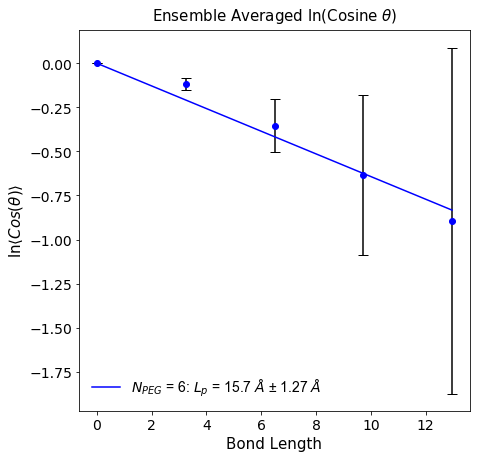

In [39]:
plt.figure(figsize=(7,7))
plt.errorbar(blen, np.log(cor_n6peg[0]), yerr=mk_n6p, color='b', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen, gg_n6peg, color='b')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$)', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
#plt.ylim(-1.9,0)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
plt.legend([r'$N_{PEG}$ = 6: $L_{p}$ = 15.7 $\AA$ ± 1.27 $\AA$'], loc=3, frameon=0, fontsize=14, prop=font)
plt.tick_params(labelsize=14)
#plt.text(5,-0.15,r'R$^{2}$ = 0.98', fontsize=15, color='blue')

In [40]:
rgpeg_olig =  pd.DataFrame(data=n6_blkspeg["Avg Radius of gyration"], columns=[r"$R_{g}$ [Angstrom] N = 6 PEG "])
rgpeg_olig

,$R_{g}$ [Angstrom] N = 6 PEG
0,4.504359
1,4.394027
2,4.359708
3,4.420467
4,4.399941


In [41]:
pers_pegt = pd.DataFrame(data=n6_blkspeg["Avg persistence length"], columns=[r"$L_{p}$ [Angstrom] N = 6 PEG "])
pers_pegt

,$L_{p}$ [Angstrom] N = 6 PEG
0,17.677850
1,15.268117
2,13.857661
3,16.276045
4,15.239774


### N = 8 PEG/water 

In [42]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n8_peg_wat = mda.Universe("n8peg_prod/n8pegonly.pdb", "n8peg_prod/nowat_n8peg.xtc")

In [43]:
n8_peg_wat.trajectory

<XTCReader n8peg_prod/nowat_n8peg.xtc with 18001 frames of 59 atoms>

In [44]:
len(n8_peg_wat.trajectory)

18001

In [45]:
#Select the polymer heavy atoms 
peg_n8 = n8_peg_wat.select_atoms("resname sPEG PEG tPEG and not type H")
list(peg_n8)

[<Atom 2: O1 of type O of resname sPEG, resid 1 and segid SYSTEM and altLoc >,
 <Atom 3: C1 of type C of resname sPEG, resid 1 and segid SYSTEM and altLoc >,
 <Atom 6: C2 of type C of resname sPEG, resid 1 and segid SYSTEM and altLoc >,
 <Atom 9: O2 of type O of resname PEG, resid 2 and segid SYSTEM and altLoc >,
 <Atom 10: C3 of type C of resname PEG, resid 2 and segid SYSTEM and altLoc >,
 <Atom 13: C2 of type C of resname PEG, resid 2 and segid SYSTEM and altLoc >,
 <Atom 16: O2 of type O of resname PEG, resid 3 and segid SYSTEM and altLoc >,
 <Atom 17: C3 of type C of resname PEG, resid 3 and segid SYSTEM and altLoc >,
 <Atom 20: C2 of type C of resname PEG, resid 3 and segid SYSTEM and altLoc >,
 <Atom 23: O2 of type O of resname PEG, resid 4 and segid SYSTEM and altLoc >,
 <Atom 24: C3 of type C of resname PEG, resid 4 and segid SYSTEM and altLoc >,
 <Atom 27: C2 of type C of resname PEG, resid 4 and segid SYSTEM and altLoc >,
 <Atom 30: O2 of type O of resname PEG, resid 5 and s

In [46]:
crv_n8peg = pers_length(peg_n8,8)
crv_n8peg

array([[ 1.        ,  0.98873357,  0.98813042,  0.98006562,  0.97684454,
         0.96659958,  0.93888196],
       [ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.        ,  6.        ],
       [ 0.        ,  8.60873574,  8.83661245, 11.45943237, 12.35395343,
        14.85011766, 20.13536353]])

In [47]:
com_bond_n8 = np.zeros(shape=(1,18000))
count = 0
for ts in n8_peg_wat.trajectory[0:18000]:
    n8_mon1 = n8_peg_wat.select_atoms("resid 1")
    n8_mon2 = n8_peg_wat.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n8_mon1.center_of_mass(), n8_mon2.center_of_mass(), 
                                                   box=n8_peg_wat.trajectory.ts.dimensions)
    com_bond_n8[0, count] = oo_len
    count += 1
    

In [48]:
com_bond_n8

array([[3.08011253, 3.12546082, 3.16393746, ..., 3.06889086, 2.9810368 ,
        2.87296042]])

In [49]:
np.mean(com_bond_n8)

3.2432765017892087

In [50]:
np.std(com_bond_n8)

0.1511749370479925

In [51]:
np.mean(com_bond)

3.2416426844376756

In [52]:
np.std(com_bond)

0.15150696554795434

### Radius of Gyration vs. time N = 8 PEG/water

In [53]:
n8peg_rgens, cor_n8peg, N8peg_cos, rgavg_n8peg = get_rg_pers_poly(peg_n8, n8_peg_wat, 0, 18000)

In [54]:
n8peg_rgens[0].shape

(18000,)

In [55]:
cor_n8peg[3]

array([0., 1., 2., 3., 4., 5., 6.])

In [56]:
N8peg_cos

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.98873357,  0.928283  ,  0.91623511, ...,  0.87247513,
         0.89610068,  0.8502428 ],
       [ 0.98813042,  0.84852434,  0.82794097, ...,  0.66807168,
         0.65201226,  0.62281397],
       ...,
       [ 0.97684454,  0.67102864,  0.58020462, ...,  0.00313198,
        -0.07020712,  0.00219735],
       [ 0.96659958,  0.46009583,  0.41145961, ..., -0.12358259,
        -0.05417917,  0.02954185],
       [ 0.93888196,  0.1245553 ,  0.33337942, ...,  0.28981302,
         0.46041239,  0.6558946 ]])

In [57]:
rgavg_n8peg

5.273065232723292

In [58]:
np.std(n8peg_rgens)

0.7445257442963289

(0.2, 2)

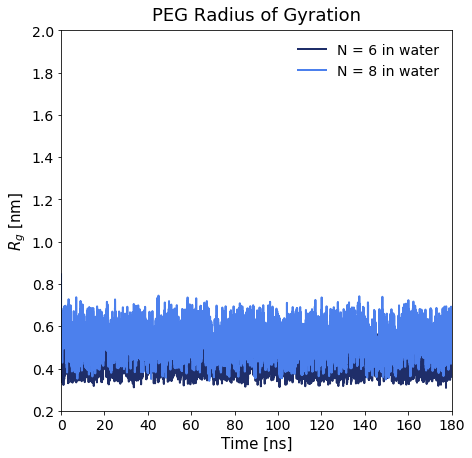

In [59]:
plt.figure(figsize=(7,7))
plt.title(r'PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6peg_rgens[0]/10,linewidth=2, color='#1F2E69')
plt.plot(trj_len/100, n8peg_rgens[0]/10,linewidth=2, color='#4C80ED')
plt.tick_params(labelsize=14)
#plt.legend(['N = 6 in water'], frameon=False, fontsize=14)
plt.legend(['N = 6 in water','N = 8 in water'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,2)

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 8 PEG/water 

In [60]:
np.arange(7, dtype=float)

array([0., 1., 2., 3., 4., 5., 6.])

In [61]:
# x values
blen_n8 = cor_n8peg[3]*lb_avg_pn6
#nt_tt[0] = 0
blen_n8

array([ 0.        ,  3.24164268,  6.48328537,  9.72492805, 12.96657074,
       16.20821342, 19.44985611])

In [62]:
mk_n8p = cor_n8peg[1]/cor_n8peg[0]
mk_n8p

array([3.70444231e-17, 2.65054465e-02, 1.10225506e-01, 2.85640352e-01,
       5.42142210e-01, 8.59463794e-01, 1.25659664e+00])

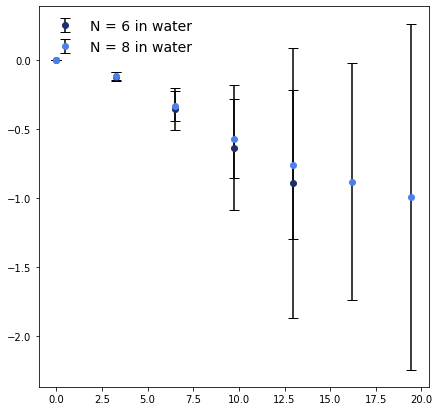

In [63]:
plt.figure(figsize=(7,7))
plt.errorbar(blen, np.log(cor_n6peg[0]), yerr=mk_n6p, color='#1F2E69', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8, np.log(cor_n8peg[0]), yerr=mk_n8p, color='#4C80ED', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.legend(['N = 6 in water','N = 8 in water'], frameon=False, fontsize=14)

In [64]:
# All the points give the best fits for N = 6 peg in water
n8_blkspeg , n8peg_fitslp = bavg_pers_cnt(5, peg_n8, n8_peg_wat, lb_avg_pn6, 5, 3000 , 18000)

3000
6000
Lp [Angstroms]: 17.986655725360524
Error in Lp from fit [Angstroms], 95% CL : 1.7297735579841018
R2 score: 0.9819752075968561
6000
9000
Lp [Angstroms]: 18.039634103777733
Error in Lp from fit [Angstroms], 95% CL : 1.558925527769904
R2 score: 0.9850131683886254
9000
12000
Lp [Angstroms]: 16.696242441118702
Error in Lp from fit [Angstroms], 95% CL : 1.866673610046297
R2 score: 0.9762922370452997
12000
15000
Lp [Angstroms]: 17.245965413575753
Error in Lp from fit [Angstroms], 95% CL : 1.7740395618673184
R2 score: 0.9796030090403648
15000
18000
Lp [Angstroms]: 17.57812667608322
Error in Lp from fit [Angstroms], 95% CL : 1.6856912181950834
R2 score: 0.9820463557404064


In [65]:
n8_blkspeg

{'Avg Radius of gyration': array([5.31731006, 5.24529783, 5.19384368, 5.2511917 , 5.28416406]),
 'Avg persistence length': array([17.98665573, 18.0396341 , 16.69624244, 17.24596541, 17.57812668])}

In [66]:
n8peg_fitslp

array([[ 1.79866557e+01,  1.80396341e+01,  1.66962424e+01,
         1.72459654e+01,  1.75781267e+01],
       [ 1.72977356e+00,  1.55892553e+00,  1.86667361e+00,
         1.77403956e+00,  1.68569122e+00],
       [-5.55967721e-02, -5.54334968e-02, -5.98937158e-02,
        -5.79845765e-02, -5.68888835e-02],
       [ 1.36394534e-03,  1.09486352e-03,  2.13935055e-03,
         1.69744888e-03,  1.41999180e-03]])

In [67]:
n8peg_fitslp[2]

array([-0.05559677, -0.0554335 , -0.05989372, -0.05798458, -0.05688888])

In [68]:
np.mean(n8peg_fitslp[3])

0.0015431200174387608

In [69]:
blen_n8

array([ 0.        ,  3.24164268,  6.48328537,  9.72492805, 12.96657074,
       16.20821342, 19.44985611])

In [70]:
gg_n6peg_n = line_fit(np.mean(n6peg_fitslp[2]),blen_n8)
gg_n6peg_n

array([-0.        , -0.20829754, -0.41659508, -0.62489262, -0.83319016,
       -1.0414877 , -1.24978524])

In [71]:
gg_n8peg = line_fit(np.mean(n8peg_fitslp[2]),blen_n8)

In [72]:
gg_n8peg

array([-0.        , -0.18529064, -0.37058128, -0.55587192, -0.74116256,
       -0.9264532 , -1.11174384])

### Block averaged Radius of gyration and persistence length, N = 8 PEG/water

In [73]:
np.mean(n8_blkspeg["Avg persistence length"])

17.509324871983186

In [74]:
np.std(n8_blkspeg["Avg persistence length"])

0.4988521939157999

In [75]:
np.mean(n8_blkspeg["Avg Radius of gyration"])

5.258361468692826

In [76]:
np.std(n8_blkspeg["Avg Radius of gyration"])

0.04129241905807037

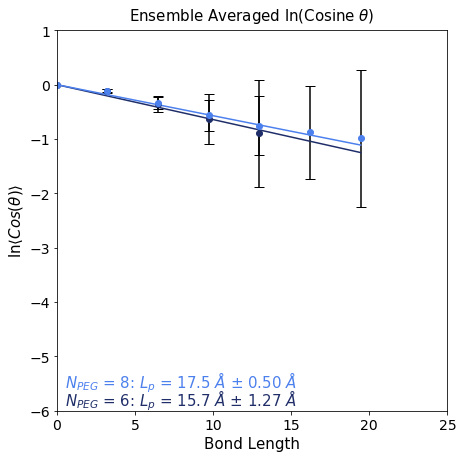

In [77]:
plt.figure(figsize=(7,7))
plt.errorbar(blen, np.log(cor_n6peg[0]), yerr=mk_n6p, color='#1F2E69', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8, np.log(cor_n8peg[0]), yerr=mk_n8p, color='#4C80ED', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n8, gg_n6peg_n, color='#1F2E69')
plt.plot(blen_n8, gg_n8peg, color='#4C80ED')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$)', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-6,1)
plt.xlim(0,25)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
plt.text(0.5, -5.9,r'$N_{PEG}$ = 6: $L_{p}$ = 15.7 $\AA$ ± 1.27 $\AA$', fontsize=15, color='#1F2E69')
plt.text(0.5,-5.58,r'$N_{PEG}$ = 8: $L_{p}$ = 17.5 $\AA$ ± 0.50 $\AA$', fontsize=15, color='#4C80ED')
plt.tick_params(labelsize=14)
#plt.text(5,-0.15,r'R$^{2}$ = 0.98', fontsize=15, color='blue')

In [78]:
rgpeg_olig

,$R_{g}$ [Angstrom] N = 6 PEG
0,4.504359
1,4.394027
2,4.359708
3,4.420467
4,4.399941


In [79]:
rgpeg_olig[r"$R_{g}$ [Angstrom] N = 8 PEG "] = n8_blkspeg["Avg Radius of gyration"]
rgpeg_olig

,$R_{g}$ [Angstrom] N = 6 PEG,$R_{g}$ [Angstrom] N = 8 PEG
0,4.504359,5.317310
1,4.394027,5.245298
2,4.359708,5.193844
3,4.420467,5.251192
4,4.399941,5.284164


In [80]:
pers_pegt[r"$L_{p}$ [Angstrom] N = 8 PEG "] = n8_blkspeg["Avg persistence length"]
pers_pegt

,$L_{p}$ [Angstrom] N = 6 PEG,$L_{p}$ [Angstrom] N = 8 PEG
0,17.677850,17.986656
1,15.268117,18.039634
2,13.857661,16.696242
3,16.276045,17.245965
4,15.239774,17.578127


### N = 10 PEG/water

In [81]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n10_peg_wat = mda.Universe("n10peg_prod/n10pegonly.pdb", "n10peg_prod/nowat_n10peg.xtc")

In [82]:
n10_peg_wat.trajectory

<XTCReader n10peg_prod/nowat_n10peg.xtc with 18001 frames of 73 atoms>

In [83]:
len(n10_peg_wat.trajectory)

18001

In [84]:
#Select the polymer heavy atoms 
peg_n10 = n10_peg_wat.select_atoms("resname sPEG PEG tPEG and not type H")
list(peg_n10)

[<Atom 2: O1 of type O of resname sPEG, resid 1 and segid SYSTEM and altLoc >,
 <Atom 3: C1 of type C of resname sPEG, resid 1 and segid SYSTEM and altLoc >,
 <Atom 6: C2 of type C of resname sPEG, resid 1 and segid SYSTEM and altLoc >,
 <Atom 9: O2 of type O of resname PEG, resid 2 and segid SYSTEM and altLoc >,
 <Atom 10: C3 of type C of resname PEG, resid 2 and segid SYSTEM and altLoc >,
 <Atom 13: C2 of type C of resname PEG, resid 2 and segid SYSTEM and altLoc >,
 <Atom 16: O2 of type O of resname PEG, resid 3 and segid SYSTEM and altLoc >,
 <Atom 17: C3 of type C of resname PEG, resid 3 and segid SYSTEM and altLoc >,
 <Atom 20: C2 of type C of resname PEG, resid 3 and segid SYSTEM and altLoc >,
 <Atom 23: O2 of type O of resname PEG, resid 4 and segid SYSTEM and altLoc >,
 <Atom 24: C3 of type C of resname PEG, resid 4 and segid SYSTEM and altLoc >,
 <Atom 27: C2 of type C of resname PEG, resid 4 and segid SYSTEM and altLoc >,
 <Atom 30: O2 of type O of resname PEG, resid 5 and s

In [85]:
crv_n10peg = pers_length(peg_n10,10)
crv_n10peg

array([[ 1.        ,  0.99446339,  0.99388726,  0.9921273 ,  0.99064299,
         0.98656317,  0.98354507,  0.97720153,  0.94822403],
       [ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.        ,  6.        ,  7.        ,  8.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         9.40315283, 10.40837608, 12.25798515, 18.51798068]])

In [86]:
com_bond_n10 = np.zeros(shape=(1,18000))
count = 0
for ts in n10_peg_wat.trajectory[0:18000]:
    n10_mon1 = n10_peg_wat.select_atoms("resid 1")
    n10_mon2 = n10_peg_wat.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n10_mon1.center_of_mass(), n10_mon2.center_of_mass(), 
                                                   box=n10_peg_wat.trajectory.ts.dimensions)
    com_bond_n10[0, count] = oo_len
    count += 1
    

In [87]:
np.mean(com_bond_n10)

3.2415557268808546

In [88]:
np.std(com_bond_n10)

0.15329762765990188

In [89]:
np.mean(com_bond)

3.2416426844376756

In [90]:
lb_avg_pn6 = np.mean(com_bond)
lb_avg_pn6

3.2416426844376756

In [91]:
np.std(com_bond)

0.15150696554795434

### Radius of Gyration vs. time, N = 10 PEG/water

In [92]:
n10peg_rgens, cor_n10peg, N10peg_cos, rgavg_n10peg = get_rg_pers_poly(peg_n10, n10_peg_wat, 0, 18000)

In [93]:
n10peg_rgens[0].shape

(18000,)

In [94]:
cor_n10peg[3]

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

In [95]:
N10peg_cos

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.99446339, 0.96037438, 0.91431766, ..., 0.89765875, 0.89694699,
        0.89982891],
       [0.99388726, 0.91890609, 0.76712704, ..., 0.71710198, 0.73014049,
        0.71485041],
       ...,
       [0.98354507, 0.9494916 , 0.78503517, ..., 0.71304235, 0.6599278 ,
        0.7011813 ],
       [0.97720153, 0.96184537, 0.62604886, ..., 0.95439409, 0.85209456,
        0.70693065],
       [0.94822403, 0.98168023, 0.68359315, ..., 0.85767808, 0.69550324,
        0.51846997]])

In [96]:
rgavg_n10peg

6.057525011125419

In [97]:
np.std(n10peg_rgens)

0.9440694633423056

(0.2, 2)

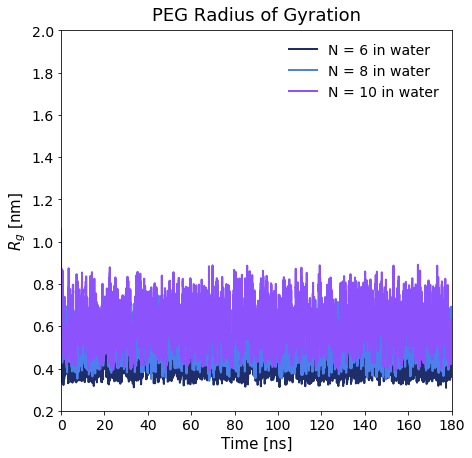

In [98]:
plt.figure(figsize=(7,7))
plt.title(r'PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6peg_rgens[0]/10,linewidth=2, color='#1F2E69')
plt.plot(trj_len/100, n8peg_rgens[0]/10,linewidth=2, color='#4C80ED')
plt.plot(trj_len/100, n10peg_rgens[0]/10,linewidth=2, color='#8C52FC')
plt.tick_params(labelsize=14)
#plt.legend(['N = 6 in water'], frameon=False, fontsize=14)
plt.legend(['N = 6 in water','N = 8 in water', 'N = 10 in water'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,2)


#### Correlation values at each arc length for the whole 180 ns trajectory

In [99]:
# x values
blen_n10 = cor_n10peg[3]*lb_avg_pn6
#nt_tt[0] = 0
blen_n10

array([ 0.        ,  3.24164268,  6.48328537,  9.72492805, 12.96657074,
       16.20821342, 19.44985611, 22.69149879, 25.93314148])

In [100]:
mk_n10p = cor_n10peg[1]/cor_n10peg[0]
mk_n10p

array([3.77765971e-17, 2.26682957e-02, 9.10756153e-02, 2.23904157e-01,
       3.92864554e-01, 5.75601858e-01, 8.10612561e-01, 1.08754020e+00,
       1.38019283e+00])

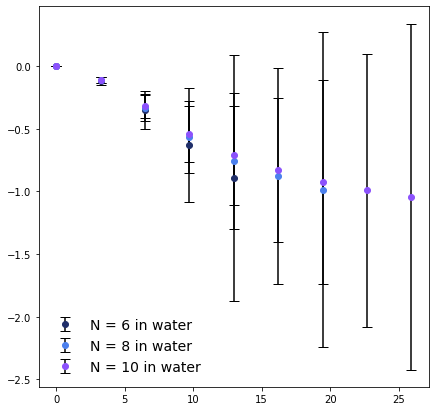

In [101]:
plt.figure(figsize=(7,7))
plt.errorbar(blen, np.log(cor_n6peg[0]), yerr=mk_n6p, color='#1F2E69', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8, np.log(cor_n8peg[0]), yerr=mk_n8p, color='#4C80ED', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10, np.log(cor_n10peg[0]), yerr=mk_n10p, color='#8C52FC', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.legend(['N = 6 in water','N = 8 in water','N = 10 in water'], frameon=False, fontsize=14)

In [102]:
# All the points give the best fits for N = 10 peg in water, first 6 points 
n10_blkspeg , n10peg_fitslp = bavg_pers_cnt(5, peg_n10, n10_peg_wat, lb_avg_pn6, 6, 3000 , 18000)

3000
6000
Lp [Angstroms]: 19.59589001014616
Error in Lp from fit [Angstroms], 95% CL : 1.0575580324357219
R2 score: 0.9887265611998556
6000
9000
Lp [Angstroms]: 19.248204156189633
Error in Lp from fit [Angstroms], 95% CL : 1.0016726273747465
R2 score: 0.9895904753858324
9000
12000
Lp [Angstroms]: 18.032623158093312
Error in Lp from fit [Angstroms], 95% CL : 1.0318476391097842
R2 score: 0.9876657474381514
12000
15000
Lp [Angstroms]: 19.440085699328822
Error in Lp from fit [Angstroms], 95% CL : 0.961626726328938
R2 score: 0.9906073815380914
15000
18000
Lp [Angstroms]: 19.323741300077636
Error in Lp from fit [Angstroms], 95% CL : 1.0952574431364774
R2 score: 0.9874933150977905


In [103]:
n10_blkspeg

{'Avg Radius of gyration': array([6.06445264, 6.09004812, 6.02170654, 6.15566346, 6.0432478 ]),
 'Avg persistence length': array([19.59589001, 19.24820416, 18.03262316, 19.4400857 , 19.3237413 ])}

In [104]:
n10peg_fitslp

array([[ 1.95958900e+01,  1.92482042e+01,  1.80326232e+01,
         1.94400857e+01,  1.93237413e+01],
       [ 1.05755803e+00,  1.00167263e+00,  1.03184764e+00,
         9.61626726e-01,  1.09525744e+00],
       [-5.10311090e-02, -5.19528987e-02, -5.54550490e-02,
        -5.14401024e-02, -5.17498131e-02],
       [ 9.67967777e-04,  9.32831500e-04,  1.28501435e-03,
         8.26290589e-04,  1.09794358e-03]])

In [105]:
n10peg_fitslp[2]

array([-0.05103111, -0.0519529 , -0.05545505, -0.0514401 , -0.05174981])

In [106]:
np.mean(n10peg_fitslp[3])

0.0010220095601478575

In [107]:
blen_n10

array([ 0.        ,  3.24164268,  6.48328537,  9.72492805, 12.96657074,
       16.20821342, 19.44985611, 22.69149879, 25.93314148])

In [108]:
gg_n6peg_n10 = line_fit(np.mean(n6peg_fitslp[2]),blen_n10)
gg_n6peg_n10

array([-0.        , -0.20829754, -0.41659508, -0.62489262, -0.83319016,
       -1.0414877 , -1.24978524, -1.45808278, -1.66638032])

In [109]:
gg_n8peg_n10 = line_fit(np.mean(n8peg_fitslp[2]),blen_n10)
gg_n8peg_n10

array([-0.        , -0.18529064, -0.37058128, -0.55587192, -0.74116256,
       -0.9264532 , -1.11174384, -1.29703447, -1.48232511])

In [110]:
gg_n10peg = line_fit(np.mean(n10peg_fitslp[2]),blen_n10)

### Block averaged Radius of gyration and persistence length 

In [111]:
np.mean(n10_blkspeg["Avg persistence length"])

19.128108864767114

In [112]:
np.std(n10_blkspeg["Avg persistence length"])

0.5601665123102703

In [113]:
np.mean(n10_blkspeg["Avg Radius of gyration"])

6.075023711479959

In [114]:
np.std(n10_blkspeg["Avg Radius of gyration"])

0.04624430353488021

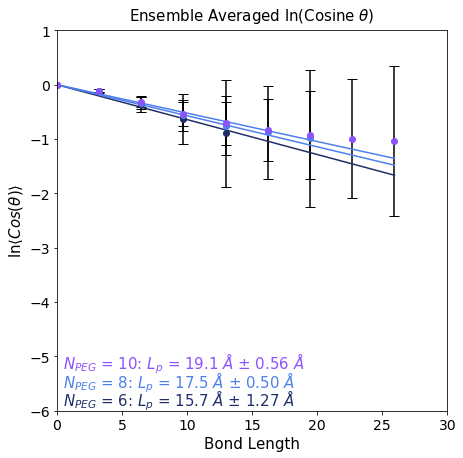

In [115]:
plt.figure(figsize=(7,7))
plt.errorbar(blen, np.log(cor_n6peg[0]), yerr=mk_n6p, color='#1F2E69', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8, np.log(cor_n8peg[0]), yerr=mk_n8p, color='#4C80ED', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10, np.log(cor_n10peg[0]), yerr=mk_n10p, color='#8C52FC', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n10, gg_n6peg_n10, color='#1F2E69')
plt.plot(blen_n10, gg_n8peg_n10, color='#4C80ED')
plt.plot(blen_n10, gg_n10peg, color='#4C80ED')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$)', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-6,1)
plt.xlim(0,30)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
plt.text(0.5, -5.9,r'$N_{PEG}$ = 6: $L_{p}$ = 15.7 $\AA$ ± 1.27 $\AA$', fontsize=15, color='#1F2E69')
plt.text(0.5,-5.58,r'$N_{PEG}$ = 8: $L_{p}$ = 17.5 $\AA$ ± 0.50 $\AA$', fontsize=15, color='#4C80ED')
plt.text(0.5,-5.23,r'$N_{PEG}$ = 10: $L_{p}$ = 19.1 $\AA$ ± 0.56 $\AA$', fontsize=15, color='#8C52FC')
plt.tick_params(labelsize=14)
#plt.text(5,-0.15,r'R$^{2}$ = 0.98', fontsize=15, color='blue')

In [116]:
rgpeg_olig

,$R_{g}$ [Angstrom] N = 6 PEG,$R_{g}$ [Angstrom] N = 8 PEG
0,4.504359,5.317310
1,4.394027,5.245298
2,4.359708,5.193844
3,4.420467,5.251192
4,4.399941,5.284164


In [117]:
rgpeg_olig[r"$R_{g}$ [Angstrom] N = 10 PEG "] = n10_blkspeg["Avg Radius of gyration"]
rgpeg_olig

,$R_{g}$ [Angstrom] N = 6 PEG,$R_{g}$ [Angstrom] N = 8 PEG,$R_{g}$ [Angstrom] N = 10 PEG
0,4.504359,5.317310,6.064453
1,4.394027,5.245298,6.090048
2,4.359708,5.193844,6.021707
3,4.420467,5.251192,6.155663
4,4.399941,5.284164,6.043248


In [118]:
pers_pegt[r"$L_{p}$ [Angstrom] N = 10 PEG "] = n10_blkspeg["Avg persistence length"]
pers_pegt

,$L_{p}$ [Angstrom] N = 6 PEG,$L_{p}$ [Angstrom] N = 8 PEG,$L_{p}$ [Angstrom] N = 10 PEG
0,17.677850,17.986656,19.595890
1,15.268117,18.039634,19.248204
2,13.857661,16.696242,18.032623
3,16.276045,17.245965,19.440086
4,15.239774,17.578127,19.323741


### N = 20 PEG/water

In [119]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n20_peg_wat = mda.Universe("n20peg_prod/n20pegonly.pdb", "n20peg_prod/nowat_n20peg.xtc")

In [120]:
n20_peg_wat.trajectory

<XTCReader n20peg_prod/nowat_n20peg.xtc with 18001 frames of 143 atoms>

In [121]:
len(n20_peg_wat.trajectory)

18001

In [122]:
#Select the polymer heavy atoms 
peg_n20 = n20_peg_wat.select_atoms("resname sPEG PEG tPEG and not type H")
list(peg_n20)

[<Atom 2: O1 of type O of resname sPEG, resid 1 and segid SYSTEM and altLoc >,
 <Atom 3: C1 of type C of resname sPEG, resid 1 and segid SYSTEM and altLoc >,
 <Atom 6: C2 of type C of resname sPEG, resid 1 and segid SYSTEM and altLoc >,
 <Atom 9: O2 of type O of resname PEG, resid 2 and segid SYSTEM and altLoc >,
 <Atom 10: C3 of type C of resname PEG, resid 2 and segid SYSTEM and altLoc >,
 <Atom 13: C2 of type C of resname PEG, resid 2 and segid SYSTEM and altLoc >,
 <Atom 16: O2 of type O of resname PEG, resid 3 and segid SYSTEM and altLoc >,
 <Atom 17: C3 of type C of resname PEG, resid 3 and segid SYSTEM and altLoc >,
 <Atom 20: C2 of type C of resname PEG, resid 3 and segid SYSTEM and altLoc >,
 <Atom 23: O2 of type O of resname PEG, resid 4 and segid SYSTEM and altLoc >,
 <Atom 24: C3 of type C of resname PEG, resid 4 and segid SYSTEM and altLoc >,
 <Atom 27: C2 of type C of resname PEG, resid 4 and segid SYSTEM and altLoc >,
 <Atom 30: O2 of type O of resname PEG, resid 5 and s

In [123]:
crv_n20peg = pers_length(peg_n20,20)
crv_n20peg

array([[ 1.        ,  0.99290951,  0.99004814,  0.9874047 ,  0.98870929,
         0.98726046,  0.98824516,  0.98755782,  0.98737445,  0.98597335,
         0.98393783,  0.98299962,  0.98838248,  0.98936751,  0.98979067,
         0.9921898 ,  0.9894305 ,  0.99275364,  0.98661592],
       [ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.        ,  6.        ,  7.        ,  8.        ,  9.        ,
        10.        , 11.        , 12.        , 13.        , 14.        ,
        15.        , 16.        , 17.        , 18.        ],
       [ 0.        ,  0.        ,  0.        ,  9.10329927,  8.61802628,
         9.15538586,  8.79371314,  9.04768038,  9.11424554,  9.60779034,
        10.28307063, 10.57996147,  8.74209853,  8.36258796,  8.19419914,
         0.        ,  8.33773588,  0.        ,  9.38463836]])

In [124]:
com_bond_n20 = np.zeros(shape=(1,18000))
count = 0
for ts in n20_peg_wat.trajectory[0:18000]:
    n20_mon1 = n20_peg_wat.select_atoms("resid 1")
    n20_mon2 = n20_peg_wat.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n20_mon1.center_of_mass(), n20_mon2.center_of_mass(), 
                                                   box=n20_peg_wat.trajectory.ts.dimensions)
    com_bond_n20[0, count] = oo_len
    count += 1
    

In [125]:
np.mean(com_bond_n20)

3.2421872911182366

In [126]:
np.std(com_bond_n20)

0.15352193811305248

In [127]:
np.mean(com_bond)

3.2416426844376756

In [128]:
lb_avg_pn6 = np.mean(com_bond)
lb_avg_pn6

3.2416426844376756

In [129]:
np.std(com_bond)

0.15150696554795434

### Radius of Gyration vs. time, N = 20 PEG/water

In [130]:
n20peg_rgens, cor_n20peg, N20peg_cos, rgavg_n20peg = get_rg_pers_poly(peg_n20, n20_peg_wat, 0, 18000)

In [131]:
n20peg_rgens[0].shape

(18000,)

In [132]:
cor_n20peg[3]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18.])

In [133]:
N20peg_cos

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.99290951, 0.94377203, 0.92276863, ..., 0.90257825, 0.90043125,
        0.90033914],
       [0.99004814, 0.90389526, 0.85880107, ..., 0.74003044, 0.75018364,
        0.72567762],
       ...,
       [0.9894305 , 0.81752145, 0.82278582, ..., 0.47420321, 0.6232851 ,
        0.43625777],
       [0.99275364, 0.75226689, 0.79389596, ..., 0.39196791, 0.59696218,
        0.30007933],
       [0.98661592, 0.68103567, 0.84983189, ..., 0.19571155, 0.4124117 ,
        0.03288928]])

In [134]:
rgavg_n20peg

8.658346044705919

In [135]:
np.std(n20peg_rgens)

1.6813116628258133

(0.2, 3)

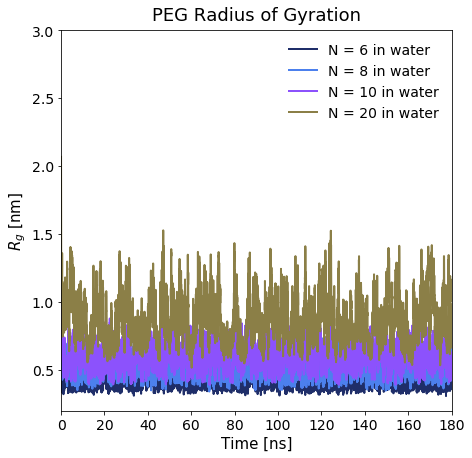

In [163]:
plt.figure(figsize=(7,7))
plt.title(r'PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6peg_rgens[0]/10,linewidth=2, color='#1F2E69')
plt.plot(trj_len/100, n8peg_rgens[0]/10,linewidth=2, color='#4C80ED')
plt.plot(trj_len/100, n10peg_rgens[0]/10,linewidth=2, color='#8C52FC')
plt.plot(trj_len/100, n20peg_rgens[0]/10,linewidth=2, color='#8B7F47')
plt.tick_params(labelsize=14)
#plt.legend(['N = 6 in water'], frameon=False, fontsize=14)
plt.legend(['N = 6 in water','N = 8 in water', 'N = 10 in water','N = 20 in water'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,3)


#### Correlation values at each arc length for the whole 180 ns trajectory

In [137]:
# x values
blen_n20 = cor_n20peg[3]*lb_avg_pn6
#nt_tt[0] = 0
blen_n20

array([ 0.        ,  3.24164268,  6.48328537,  9.72492805, 12.96657074,
       16.20821342, 19.44985611, 22.69149879, 25.93314148, 29.17478416,
       32.41642684, 35.65806953, 38.89971221, 42.1413549 , 45.38299758,
       48.62464027, 51.86628295, 55.10792564, 58.34956832])

In [138]:
mk_n20p = cor_n20peg[1]/cor_n20peg[0]
mk_n20p

array([2.04044911e-17, 1.45322468e-02, 5.57373413e-02, 1.30657543e-01,
       2.15010837e-01, 2.90121680e-01, 3.62228059e-01, 4.38115784e-01,
       5.34423266e-01, 6.51212387e-01, 7.80420411e-01, 9.17797075e-01,
       1.04957739e+00, 1.17926385e+00, 1.31121289e+00, 1.49237731e+00,
       1.71314048e+00, 1.98000229e+00, 2.23019205e+00])

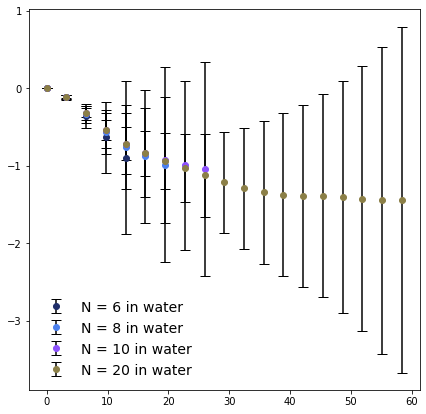

In [139]:
plt.figure(figsize=(7,7))
plt.errorbar(blen, np.log(cor_n6peg[0]), yerr=mk_n6p, color='#1F2E69', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8, np.log(cor_n8peg[0]), yerr=mk_n8p, color='#4C80ED', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10, np.log(cor_n10peg[0]), yerr=mk_n10p, color='#8C52FC', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20, np.log(cor_n20peg[0]), yerr=mk_n20p, color='#8B7F47', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.legend(['N = 6 in water','N = 8 in water','N = 10 in water', 'N = 20 in water'], frameon=False, fontsize=14)

In [140]:
# All the points give the best fits for N = 10 peg in water, first 6 points 
n20_blkspeg , n20peg_fitslp = bavg_pers_cnt(5, peg_n20, n20_peg_wat, lb_avg_pn6, 6, 3000 , 18000)

3000
6000
Lp [Angstroms]: 19.22731201808064
Error in Lp from fit [Angstroms], 95% CL : 0.2483237679390541
R2 score: 0.9892018501181489
6000
9000
Lp [Angstroms]: 18.833002747870772
Error in Lp from fit [Angstroms], 95% CL : 0.24659365705413533
R2 score: 0.9890562490060935
9000
12000
Lp [Angstroms]: 19.273258449561677
Error in Lp from fit [Angstroms], 95% CL : 0.25147309036896887
R2 score: 0.9888886856415472
12000
15000
Lp [Angstroms]: 18.73569048651651
Error in Lp from fit [Angstroms], 95% CL : 0.2487014817506103
R2 score: 0.9885519361159764
15000
18000
Lp [Angstroms]: 18.550275915021274
Error in Lp from fit [Angstroms], 95% CL : 0.2687222431781884
R2 score: 0.9863344582433174


In [141]:
n20_blkspeg

{'Avg Radius of gyration': array([8.63074999, 8.52538141, 8.6375836 , 8.4874659 , 8.83965728]),
 'Avg persistence length': array([19.22731202, 18.83300275, 19.27325845, 18.73569049, 18.55027592])}

In [142]:
n20peg_fitslp

array([[ 1.92273120e+01,  1.88330027e+01,  1.92732584e+01,
         1.87356905e+01,  1.85502759e+01],
       [ 2.48323768e-01,  2.46593657e-01,  2.51473090e-01,
         2.48701482e-01,  2.68722243e-01],
       [-5.20093500e-02, -5.30982772e-02, -5.18853624e-02,
        -5.33740670e-02, -5.39075540e-02],
       [ 9.84965799e-04,  1.05522335e-03,  1.00050975e-03,
         1.09581389e-03,  1.33126528e-03]])

In [143]:
n20peg_fitslp[2]

array([-0.05200935, -0.05309828, -0.05188536, -0.05337407, -0.05390755])

In [144]:
np.mean(n20peg_fitslp[3])

0.0010935556126879568

In [145]:
blen_n20

array([ 0.        ,  3.24164268,  6.48328537,  9.72492805, 12.96657074,
       16.20821342, 19.44985611, 22.69149879, 25.93314148, 29.17478416,
       32.41642684, 35.65806953, 38.89971221, 42.1413549 , 45.38299758,
       48.62464027, 51.86628295, 55.10792564, 58.34956832])

In [146]:
gg_n6peg_n20 = line_fit(np.mean(n6peg_fitslp[2]),blen_n20)
gg_n6peg_n20

array([-0.        , -0.20829754, -0.41659508, -0.62489262, -0.83319016,
       -1.0414877 , -1.24978524, -1.45808278, -1.66638032, -1.87467787,
       -2.08297541, -2.29127295, -2.49957049, -2.70786803, -2.91616557,
       -3.12446311, -3.33276065, -3.54105819, -3.74935573])

In [147]:
gg_n8peg_n20 = line_fit(np.mean(n8peg_fitslp[2]),blen_n20)
gg_n8peg_n20

array([-0.        , -0.18529064, -0.37058128, -0.55587192, -0.74116256,
       -0.9264532 , -1.11174384, -1.29703447, -1.48232511, -1.66761575,
       -1.85290639, -2.03819703, -2.22348767, -2.40877831, -2.59406895,
       -2.77935959, -2.96465023, -3.14994087, -3.33523151])

In [148]:
gg_n10peg_n20 = line_fit(np.mean(n10peg_fitslp[2]),blen_n20)
gg_n10peg_n20

array([-0.        , -0.16962153, -0.33924306, -0.50886459, -0.67848611,
       -0.84810764, -1.01772917, -1.1873507 , -1.35697223, -1.52659376,
       -1.69621529, -1.86583682, -2.03545834, -2.20507987, -2.3747014 ,
       -2.54432293, -2.71394446, -2.88356599, -3.05318752])

In [149]:
gg_n20peg = line_fit(np.mean(n20peg_fitslp[2]),blen_n20)

### Block averaged Radius of gyration and persistence length, N = 20 PEG/water

In [150]:
np.mean(n20_blkspeg["Avg persistence length"])

18.923907923410173

In [151]:
np.std(n20_blkspeg["Avg persistence length"])

0.2819185226154993

In [152]:
np.mean(n20_blkspeg["Avg Radius of gyration"])

8.624167636730935

In [153]:
np.std(n20_blkspeg["Avg Radius of gyration"])

0.12256033985105498

In [161]:
blen_n20[:10]

array([ 0.        ,  3.24164268,  6.48328537,  9.72492805, 12.96657074,
       16.20821342, 19.44985611, 22.69149879, 25.93314148, 29.17478416])

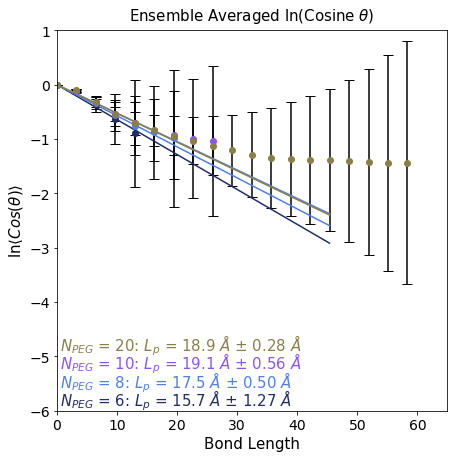

In [169]:
plt.figure(figsize=(7,7))
plt.errorbar(blen, np.log(cor_n6peg[0]), yerr=mk_n6p, color='#1F2E69', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8, np.log(cor_n8peg[0]), yerr=mk_n8p, color='#4C80ED', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10, np.log(cor_n10peg[0]), yerr=mk_n10p, color='#8C52FC', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20, np.log(cor_n20peg[0]), yerr=mk_n20p, color='#8B7F47', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n20[:15], gg_n6peg_n20[:15], color='#1F2E69')
plt.plot(blen_n20[:15], gg_n8peg_n20[:15], color='#4C80ED')
plt.plot(blen_n20[:15], gg_n10peg_n20[:15], color='#4C80ED')
plt.plot(blen_n20[:15], gg_n20peg[:15], color='#8B7F47')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$)', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-6,1)
plt.xlim(0,65)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
plt.text(0.5, -5.9,r'$N_{PEG}$ = 6: $L_{p}$ = 15.7 $\AA$ ± 1.27 $\AA$', fontsize=15, color='#1F2E69')
plt.text(0.5,-5.58,r'$N_{PEG}$ = 8: $L_{p}$ = 17.5 $\AA$ ± 0.50 $\AA$', fontsize=15, color='#4C80ED')
plt.text(0.5,-5.23,r'$N_{PEG}$ = 10: $L_{p}$ = 19.1 $\AA$ ± 0.56 $\AA$', fontsize=15, color='#8C52FC')
plt.text(0.5,-4.90,r'$N_{PEG}$ = 20: $L_{p}$ = 18.9 $\AA$ ± 0.28 $\AA$', fontsize=15, color='#8B7F47')
plt.tick_params(labelsize=14)

In [170]:
rgpeg_olig

,$R_{g}$ [Angstrom] N = 6 PEG,$R_{g}$ [Angstrom] N = 8 PEG,$R_{g}$ [Angstrom] N = 10 PEG
0,4.504359,5.317310,6.064453
1,4.394027,5.245298,6.090048
2,4.359708,5.193844,6.021707
3,4.420467,5.251192,6.155663
4,4.399941,5.284164,6.043248


In [171]:
rgpeg_olig[r"$R_{g}$ [Angstrom] N = 20 PEG "] = n20_blkspeg["Avg Radius of gyration"]
rgpeg_olig

,$R_{g}$ [Angstrom] N = 6 PEG,$R_{g}$ [Angstrom] N = 8 PEG,$R_{g}$ [Angstrom] N = 10 PEG,$R_{g}$ [Angstrom] N = 20 PEG
0,4.504359,5.317310,6.064453,8.630750
1,4.394027,5.245298,6.090048,8.525381
2,4.359708,5.193844,6.021707,8.637584
3,4.420467,5.251192,6.155663,8.487466
4,4.399941,5.284164,6.043248,8.839657


In [172]:
pers_pegt[r"$L_{p}$ [Angstrom] N = 20 PEG "] = n20_blkspeg["Avg persistence length"]
pers_pegt

,$L_{p}$ [Angstrom] N = 6 PEG,$L_{p}$ [Angstrom] N = 8 PEG,$L_{p}$ [Angstrom] N = 10 PEG,$L_{p}$ [Angstrom] N = 20 PEG
0,17.677850,17.986656,19.595890,19.227312
1,15.268117,18.039634,19.248204,18.833003
2,13.857661,16.696242,18.032623,19.273258
3,16.276045,17.245965,19.440086,18.735690
4,15.239774,17.578127,19.323741,18.550276


## N = 30 PEG/water

In [173]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n30_peg_wat = mda.Universe("n30peg_prod/n30pegonly.pdb", "n30peg_prod/nowat_n30peg.xtc")

In [174]:
n30_peg_wat.trajectory

<XTCReader n30peg_prod/nowat_n30peg.xtc with 18001 frames of 213 atoms>

In [175]:
len(n30_peg_wat.trajectory)

18001

In [176]:
#Select the polymer heavy atoms 
peg_n30 = n30_peg_wat.select_atoms("resname sPEG PEG tPEG and not type H")
list(peg_n30)

[<Atom 2: O1 of type O of resname sPEG, resid 1 and segid SYSTEM and altLoc >,
 <Atom 3: C1 of type C of resname sPEG, resid 1 and segid SYSTEM and altLoc >,
 <Atom 6: C2 of type C of resname sPEG, resid 1 and segid SYSTEM and altLoc >,
 <Atom 9: O2 of type O of resname PEG, resid 2 and segid SYSTEM and altLoc >,
 <Atom 10: C3 of type C of resname PEG, resid 2 and segid SYSTEM and altLoc >,
 <Atom 13: C2 of type C of resname PEG, resid 2 and segid SYSTEM and altLoc >,
 <Atom 16: O2 of type O of resname PEG, resid 3 and segid SYSTEM and altLoc >,
 <Atom 17: C3 of type C of resname PEG, resid 3 and segid SYSTEM and altLoc >,
 <Atom 20: C2 of type C of resname PEG, resid 3 and segid SYSTEM and altLoc >,
 <Atom 23: O2 of type O of resname PEG, resid 4 and segid SYSTEM and altLoc >,
 <Atom 24: C3 of type C of resname PEG, resid 4 and segid SYSTEM and altLoc >,
 <Atom 27: C2 of type C of resname PEG, resid 4 and segid SYSTEM and altLoc >,
 <Atom 30: O2 of type O of resname PEG, resid 5 and s

In [177]:
crv_n30peg = pers_length(peg_n30,30)
crv_n30peg

array([[ 1.00000000e+00,  9.39009164e-01,  8.48655749e-01,
         7.92084123e-01,  7.75866707e-01,  7.65207572e-01,
         7.45888526e-01,  7.37896192e-01,  7.39473089e-01,
         7.29513981e-01,  7.23556931e-01,  6.95508402e-01,
         6.79133015e-01,  6.63667598e-01,  6.50691427e-01,
         6.29225944e-01,  5.99848841e-01,  5.77676280e-01,
         5.69498826e-01,  5.42992844e-01,  5.05310227e-01,
         4.52506077e-01,  3.91050297e-01,  3.51297973e-01,
         3.03984876e-01,  1.60563512e-01,  4.05708580e-02,
        -1.20414333e-01, -2.79538852e-01],
       [ 0.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         3.00000000e+00,  4.00000000e+00,  5.00000000e+00,
         6.00000000e+00,  7.00000000e+00,  8.00000000e+00,
         9.00000000e+00,  1.00000000e+01,  1.10000000e+01,
         1.20000000e+01,  1.30000000e+01,  1.40000000e+01,
         1.50000000e+01,  1.60000000e+01,  1.70000000e+01,
         1.80000000e+01,  1.90000000e+01,  2.00000000e+01,
         2.10

In [178]:
com_bond_n30 = np.zeros(shape=(1,18000))
count = 0
for ts in n30_peg_wat.trajectory[0:18000]:
    n30_mon1 = n30_peg_wat.select_atoms("resid 1")
    n30_mon2 = n30_peg_wat.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n30_mon1.center_of_mass(), n30_mon2.center_of_mass(), 
                                                   box=n30_peg_wat.trajectory.ts.dimensions)
    com_bond_n30[0, count] = oo_len
    count += 1
    

In [179]:
np.mean(com_bond_n30)

3.244648195630251

In [180]:
np.std(com_bond_n30)

0.15149275281908156

In [181]:
np.mean(com_bond)

3.2416426844376756

In [182]:
lb_avg_pn6 = np.mean(com_bond)
lb_avg_pn6

3.2416426844376756

In [183]:
np.std(com_bond)

0.15150696554795434

### Radius of Gyration vs. time, N = 30 PEG/water

In [184]:
n30peg_rgens, cor_n30peg, N30peg_cos, rgavg_n30peg = get_rg_pers_poly(peg_n30, n30_peg_wat, 0, 18000)

In [185]:
n30peg_rgens[0].shape

(18000,)

In [186]:
cor_n30peg[3]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28.])

In [187]:
N30peg_cos

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.93900916,  0.92400503,  0.91738167, ...,  0.90565433,
         0.90702412,  0.89669285],
       [ 0.84865575,  0.81869595,  0.80233814, ...,  0.73953571,
         0.73142661,  0.73270227],
       ...,
       [ 0.04057086,  0.14900585, -0.10265165, ..., -0.37015297,
        -0.29230701,  0.15260113],
       [-0.12041433,  0.22200368,  0.06562077, ..., -0.55385935,
        -0.16731337,  0.20830454],
       [-0.27953885,  0.0885284 ,  0.10026509, ..., -0.37718171,
         0.42892853,  0.64823344]])

In [188]:
rgavg_n30peg

10.380914534059427

In [189]:
np.std(n30peg_rgens)

2.067099179869805

(0.2, 3)

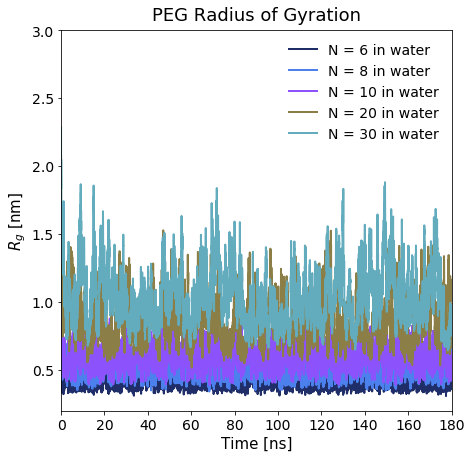

In [190]:
plt.figure(figsize=(7,7))
plt.title(r'PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6peg_rgens[0]/10,linewidth=2, color='#1F2E69')
plt.plot(trj_len/100, n8peg_rgens[0]/10,linewidth=2, color='#4C80ED')
plt.plot(trj_len/100, n10peg_rgens[0]/10,linewidth=2, color='#8C52FC')
plt.plot(trj_len/100, n20peg_rgens[0]/10,linewidth=2, color='#8B7F47')
plt.plot(trj_len/100, n30peg_rgens[0]/10,linewidth=2, color='#63ACBE')
plt.tick_params(labelsize=14)
#plt.legend(['N = 6 in water'], frameon=False, fontsize=14)
plt.legend(['N = 6 in water','N = 8 in water', 'N = 10 in water','N = 20 in water', 'N = 30 in water'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,3)


#### Correlation values at each arc length for the whole 180 ns trajectory

In [191]:
# x values
blen_n30 = cor_n30peg[3]*lb_avg_pn6
#nt_tt[0] = 0
blen_n30

array([ 0.        ,  3.24164268,  6.48328537,  9.72492805, 12.96657074,
       16.20821342, 19.44985611, 22.69149879, 25.93314148, 29.17478416,
       32.41642684, 35.65806953, 38.89971221, 42.1413549 , 45.38299758,
       48.62464027, 51.86628295, 55.10792564, 58.34956832, 61.591211  ,
       64.83285369, 68.07449637, 71.31613906, 74.55778174, 77.79942443,
       81.04106711, 84.2827098 , 87.52435248, 90.76599516])

In [192]:
mk_n30p = cor_n30peg[1]/cor_n30peg[0]
mk_n30p

array([1.65502277e-18, 1.12510297e-02, 4.20227991e-02, 9.54269549e-02,
       1.54121112e-01, 2.05329307e-01, 2.55763448e-01, 3.06237477e-01,
       3.56357881e-01, 4.09166388e-01, 4.66524178e-01, 5.25922234e-01,
       5.94213787e-01, 6.64286958e-01, 7.30875321e-01, 8.06134549e-01,
       9.02918502e-01, 1.00643776e+00, 1.11150274e+00, 1.22109693e+00,
       1.34064752e+00, 1.44923231e+00, 1.54351984e+00, 1.68132529e+00,
       1.84229604e+00, 2.01474267e+00, 2.20415060e+00, 2.46460856e+00,
       2.63403552e+00])

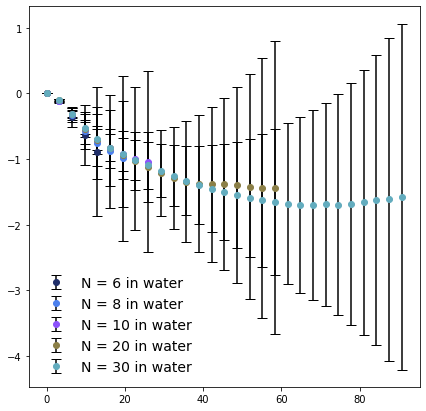

In [213]:
plt.figure(figsize=(7,7))
plt.errorbar(blen, np.log(cor_n6peg[0]), yerr=mk_n6p, color='#1F2E69', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8, np.log(cor_n8peg[0]), yerr=mk_n8p, color='#4C80ED', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10, np.log(cor_n10peg[0]), yerr=mk_n10p, color='#8C52FC', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20, np.log(cor_n20peg[0]), yerr=mk_n20p, color='#8B7F47', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n30, np.log(cor_n30peg[0]), yerr=mk_n30p, color='#63ACBE', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.legend(['N = 6 in water','N = 8 in water','N = 10 in water', 'N = 20 in water', 'N = 30 in water'], frameon=False, fontsize=14)

In [194]:
# All the points give the best fits for N = 10 peg in water, first 6 points 
n30_blkspeg , n30peg_fitslp = bavg_pers_cnt(5, peg_n30, n30_peg_wat, lb_avg_pn6, 6, 3000 , 18000)

3000
6000
Lp [Angstroms]: 19.005526383581838
Error in Lp from fit [Angstroms], 95% CL : 0.12270924107554206
R2 score: 0.9884861139783614
6000
9000
Lp [Angstroms]: 19.22325123126672
Error in Lp from fit [Angstroms], 95% CL : 0.11644146843713041
R2 score: 0.9898253639447119
9000
12000
Lp [Angstroms]: 18.264316347765927
Error in Lp from fit [Angstroms], 95% CL : 0.12156581659571247
R2 score: 0.9880210360988078
12000
15000
Lp [Angstroms]: 19.663013216682373
Error in Lp from fit [Angstroms], 95% CL : 0.12857057330511684
R2 score: 0.987962601763984
15000
18000
Lp [Angstroms]: 19.16966640856984
Error in Lp from fit [Angstroms], 95% CL : 0.11727003570516016
R2 score: 0.9896479689541405


In [195]:
n30_blkspeg

{'Avg Radius of gyration': array([ 9.86357796, 10.70005661,  9.45176166, 10.83132404, 10.44005434]),
 'Avg persistence length': array([19.00552638, 19.22325123, 18.26431635, 19.66301322, 19.16966641])}

In [196]:
n30peg_fitslp

array([[ 1.90055264e+01,  1.92232512e+01,  1.82643163e+01,
         1.96630132e+01,  1.91696664e+01],
       [ 1.22709241e-01,  1.16441468e-01,  1.21565817e-01,
         1.28570573e-01,  1.17270036e-01],
       [-5.26162749e-02, -5.20203366e-02, -5.47515703e-02,
        -5.08569052e-02, -5.21657487e-02],
       [ 1.07643764e-03,  9.26108614e-04,  1.23869163e-03,
         1.03142302e-03,  9.49882392e-04]])

In [197]:
n30peg_fitslp[2]

array([-0.05261627, -0.05202034, -0.05475157, -0.05085691, -0.05216575])

In [198]:
np.mean(n30peg_fitslp[3])

0.0010445086590903851

In [199]:
blen_n30

array([ 0.        ,  3.24164268,  6.48328537,  9.72492805, 12.96657074,
       16.20821342, 19.44985611, 22.69149879, 25.93314148, 29.17478416,
       32.41642684, 35.65806953, 38.89971221, 42.1413549 , 45.38299758,
       48.62464027, 51.86628295, 55.10792564, 58.34956832, 61.591211  ,
       64.83285369, 68.07449637, 71.31613906, 74.55778174, 77.79942443,
       81.04106711, 84.2827098 , 87.52435248, 90.76599516])

In [200]:
gg_n6peg_n30 = line_fit(np.mean(n6peg_fitslp[2]),blen_n30)
gg_n6peg_n30

array([-0.        , -0.20829754, -0.41659508, -0.62489262, -0.83319016,
       -1.0414877 , -1.24978524, -1.45808278, -1.66638032, -1.87467787,
       -2.08297541, -2.29127295, -2.49957049, -2.70786803, -2.91616557,
       -3.12446311, -3.33276065, -3.54105819, -3.74935573, -3.95765327,
       -4.16595081, -4.37424835, -4.58254589, -4.79084343, -4.99914097,
       -5.20743852, -5.41573606, -5.6240336 , -5.83233114])

In [201]:
gg_n8peg_n30 = line_fit(np.mean(n8peg_fitslp[2]),blen_n30)
gg_n8peg_n30

array([-0.        , -0.18529064, -0.37058128, -0.55587192, -0.74116256,
       -0.9264532 , -1.11174384, -1.29703447, -1.48232511, -1.66761575,
       -1.85290639, -2.03819703, -2.22348767, -2.40877831, -2.59406895,
       -2.77935959, -2.96465023, -3.14994087, -3.33523151, -3.52052214,
       -3.70581278, -3.89110342, -4.07639406, -4.2616847 , -4.44697534,
       -4.63226598, -4.81755662, -5.00284726, -5.1881379 ])

In [202]:
gg_n10peg_n30 = line_fit(np.mean(n10peg_fitslp[2]),blen_n30)
gg_n10peg_n30

array([-0.        , -0.16962153, -0.33924306, -0.50886459, -0.67848611,
       -0.84810764, -1.01772917, -1.1873507 , -1.35697223, -1.52659376,
       -1.69621529, -1.86583682, -2.03545834, -2.20507987, -2.3747014 ,
       -2.54432293, -2.71394446, -2.88356599, -3.05318752, -3.22280905,
       -3.39243057, -3.5620521 , -3.73167363, -3.90129516, -4.07091669,
       -4.24053822, -4.41015975, -4.57978128, -4.7494028 ])

In [203]:
gg_n20peg_n30 = line_fit(np.mean(n20peg_fitslp[2]),blen_n30)
gg_n20peg_n30

array([-0.        , -0.17133677, -0.34267354, -0.51401031, -0.68534709,
       -0.85668386, -1.02802063, -1.1993574 , -1.37069417, -1.54203094,
       -1.71336772, -1.88470449, -2.05604126, -2.22737803, -2.3987148 ,
       -2.57005157, -2.74138835, -2.91272512, -3.08406189, -3.25539866,
       -3.42673543, -3.5980722 , -3.76940898, -3.94074575, -4.11208252,
       -4.28341929, -4.45475606, -4.62609283, -4.79742961])

In [204]:
gg_n30peg = line_fit(np.mean(n20peg_fitslp[2]),blen_n30)

### Block averaged Radius of gyration and persistence length, N = 30 PEG/water

In [205]:
np.mean(n30_blkspeg["Avg persistence length"])

19.06515471757334

In [206]:
np.std(n30_blkspeg["Avg persistence length"])

0.45568621197579595

In [207]:
np.mean(n30_blkspeg["Avg Radius of gyration"])

10.257354921534812

In [208]:
np.std(n30_blkspeg["Avg Radius of gyration"])

0.5220814521973526

In [209]:
blen_n30[:10]

array([ 0.        ,  3.24164268,  6.48328537,  9.72492805, 12.96657074,
       16.20821342, 19.44985611, 22.69149879, 25.93314148, 29.17478416])

In [269]:
rgpeg_olig

,$R_{g}$ [Angstrom] N = 6 PEG,$R_{g}$ [Angstrom] N = 8 PEG,$R_{g}$ [Angstrom] N = 10 PEG,$R_{g}$ [Angstrom] N = 20 PEG,$R_{g}$ [Angstrom] N = 30 PEG
0,4.504359,5.317310,6.064453,8.630750,9.863578
1,4.394027,5.245298,6.090048,8.525381,10.700057
2,4.359708,5.193844,6.021707,8.637584,9.451762
3,4.420467,5.251192,6.155663,8.487466,10.831324
4,4.399941,5.284164,6.043248,8.839657,10.440054


In [268]:
rgpeg_olig.to_pickle("./PEG_water_Rg.pkl") 

In [211]:
rgpeg_olig[r"$R_{g}$ [Angstrom] N = 30 PEG "] = n30_blkspeg["Avg Radius of gyration"]
rgpeg_olig

,$R_{g}$ [Angstrom] N = 6 PEG,$R_{g}$ [Angstrom] N = 8 PEG,$R_{g}$ [Angstrom] N = 10 PEG,$R_{g}$ [Angstrom] N = 20 PEG,$R_{g}$ [Angstrom] N = 30 PEG
0,4.504359,5.317310,6.064453,8.630750,9.863578
1,4.394027,5.245298,6.090048,8.525381,10.700057
2,4.359708,5.193844,6.021707,8.637584,9.451762
3,4.420467,5.251192,6.155663,8.487466,10.831324
4,4.399941,5.284164,6.043248,8.839657,10.440054


In [212]:
pers_pegt[r"$L_{p}$ [Angstrom] N = 30 PEG "] = n30_blkspeg["Avg persistence length"]
pers_pegt

,$L_{p}$ [Angstrom] N = 6 PEG,$L_{p}$ [Angstrom] N = 8 PEG,$L_{p}$ [Angstrom] N = 10 PEG,$L_{p}$ [Angstrom] N = 20 PEG,$L_{p}$ [Angstrom] N = 30 PEG
0,17.677850,17.986656,19.595890,19.227312,19.005526
1,15.268117,18.039634,19.248204,18.833003,19.223251
2,13.857661,16.696242,18.032623,19.273258,18.264316
3,16.276045,17.245965,19.440086,18.735690,19.663013
4,15.239774,17.578127,19.323741,18.550276,19.169666


In [265]:
pers_pegt

,$L_{p}$ [Angstrom] N = 6 PEG,$L_{p}$ [Angstrom] N = 8 PEG,$L_{p}$ [Angstrom] N = 10 PEG,$L_{p}$ [Angstrom] N = 20 PEG,$L_{p}$ [Angstrom] N = 30 PEG
0,17.677850,17.986656,19.595890,19.227312,19.005526
1,15.268117,18.039634,19.248204,18.833003,19.223251
2,13.857661,16.696242,18.032623,19.273258,18.264316
3,16.276045,17.245965,19.440086,18.735690,19.663013
4,15.239774,17.578127,19.323741,18.550276,19.169666


In [270]:
pers_pegt.to_pickle("PEG_water_Lp.pkl")

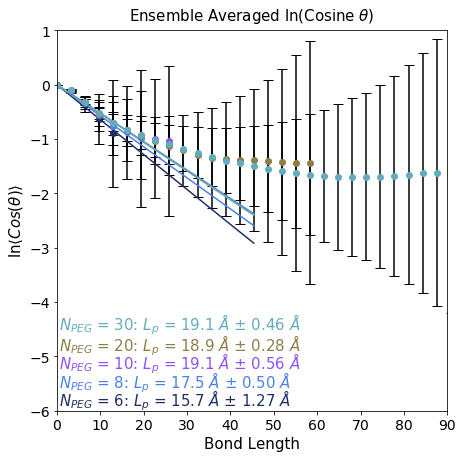

In [215]:
plt.figure(figsize=(7,7))
plt.errorbar(blen, np.log(cor_n6peg[0]), yerr=mk_n6p, color='#1F2E69', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8, np.log(cor_n8peg[0]), yerr=mk_n8p, color='#4C80ED', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10, np.log(cor_n10peg[0]), yerr=mk_n10p, color='#8C52FC', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20, np.log(cor_n20peg[0]), yerr=mk_n20p, color='#8B7F47', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n30, np.log(cor_n30peg[0]), yerr=mk_n30p, color='#63ACBE', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n30[:15], gg_n6peg_n30[:15], color='#1F2E69')
plt.plot(blen_n30[:15], gg_n8peg_n30[:15], color='#4C80ED')
plt.plot(blen_n30[:15], gg_n10peg_n30[:15], color='#4C80ED')
plt.plot(blen_n30[:15], gg_n20peg_n30[:15], color='#8B7F47')
plt.plot(blen_n30[:15], gg_n30peg[:15], color='#63ACBE')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$)', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-6,1)
plt.xlim(0,90)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
plt.text(0.5, -5.9,r'$N_{PEG}$ = 6: $L_{p}$ = 15.7 $\AA$ ± 1.27 $\AA$', fontsize=15, color='#1F2E69')
plt.text(0.5,-5.58,r'$N_{PEG}$ = 8: $L_{p}$ = 17.5 $\AA$ ± 0.50 $\AA$', fontsize=15, color='#4C80ED')
plt.text(0.5,-5.23,r'$N_{PEG}$ = 10: $L_{p}$ = 19.1 $\AA$ ± 0.56 $\AA$', fontsize=15, color='#8C52FC')
plt.text(0.5,-4.90,r'$N_{PEG}$ = 20: $L_{p}$ = 18.9 $\AA$ ± 0.28 $\AA$', fontsize=15, color='#8B7F47')
plt.text(0.5,-4.50,r'$N_{PEG}$ = 30: $L_{p}$ = 19.1 $\AA$ ± 0.46 $\AA$', fontsize=15, color='#63ACBE')
plt.tick_params(labelsize=14)

### Fluory Exponent, PEG/water systems 

In [217]:
n_peg = np.array([6,8,10,20,30])
rg_npeg = np.array([np.mean(n6_blkspeg["Avg Radius of gyration"])
                    ,np.mean(n8_blkspeg["Avg Radius of gyration"]),np.mean(n10_blkspeg["Avg Radius of gyration"])
                    ,np.mean(n20_blkspeg["Avg Radius of gyration"]),np.mean(n30_blkspeg["Avg Radius of gyration"])])

In [247]:
rg_npeg_std = np.array([np.std(np.log10(n6_blkspeg["Avg Radius of gyration"]))
                    ,np.std(np.log10(n8_blkspeg["Avg Radius of gyration"])),np.std(np.log10(n10_blkspeg["Avg Radius of gyration"]))
                    ,np.std(np.log10(n20_blkspeg["Avg Radius of gyration"])),np.std(np.log10(n30_blkspeg["Avg Radius of gyration"]))])

In [245]:
n6_blkspeg["Avg Radius of gyration"]

array([4.50435891, 4.3940265 , 4.3597076 , 4.4204671 , 4.39994122])

In [244]:
np.log10(n6_blkspeg["Avg Radius of gyration"])

array([0.65363299, 0.64286267, 0.63945736, 0.64546816, 0.64344687])

In [248]:
rg_npeg_std

array([0.00474226, 0.00341243, 0.00329737, 0.00614202, 0.02237825])

In [232]:
np.log10(rg_npeg_std)

array([-1.31471835, -1.38412967, -1.33494176, -0.91165004, -0.28226174])

In [221]:
rg_npeg

array([0.44157003, 0.52583615, 0.60750237, 0.86241676, 1.02573549])

In [219]:
n_peg

array([ 6,  8, 10, 20, 30])

In [246]:
np.log10(rg_npeg)

array([0.64499959, 0.72085044, 0.78354798, 0.93571719, 1.01103538])

In [223]:
np.log10(n_peg)

array([0.77815125, 0.90308999, 1.        , 1.30103   , 1.47712125])

In [241]:
# From fitting all points, I get best fit 
from sklearn.linear_model import LinearRegression
model_v = LinearRegression(fit_intercept=True)
model_v.fit(np.log10(n_peg).reshape(-1,1), np.log10(rg_npeg))
# Slope here is in nanometers
print("Model slope:    ", model_v.coef_[0])
print("Model intercept:", model_v.intercept_)

Model slope:     0.52221732574801
Model intercept: 0.24903224565118154


In [242]:
gg = model_v.predict(np.log10(n_peg.reshape(-1,1)))
gg

array([0.65539631, 0.72064148, 0.77124957, 0.92845265, 1.02041056])

In [243]:
print("Mean Std Error:", sklearn.metrics.mean_squared_error(np.log10(rg_npeg), gg))
print("R2 score:", sklearn.metrics.r2_score(np.log10(rg_npeg), gg))

Mean Std Error: 8.001074879623288e-05
R2 score: 0.9956357719072358


In [252]:
# Residuals between the true y data and model y data 
resid_v = np.log10(rg_npeg) - gg
resid_v

array([-0.01039672,  0.00020895,  0.01229841,  0.00726454, -0.00937517])

In [253]:
# How to calculate Sum((Xi - avg(X))^2): X values are the bond length values 
nt_tt = np.log10(n_peg)
nt_tt -= np.mean(nt_tt)
nhui = nt_tt**2
np.sum(nhui)

0.334663876760361

In [254]:
# t-value with 95 % confidence intervals 
scipy.stats.t.ppf(0.975, 4)

2.7764451051977987

In [255]:
# How to calculate 95% confidence interval for the slope 
flc_v = scipy.stats.t.ppf(0.975, 4)*np.sqrt((np.sum(resid_v**2)/len(resid_v))/(np.sum(nhui)))
flc_v

0.04292979748885229

Text(1.1, 0.8, '$v_{water}$ = 0.52 ± 0.04')

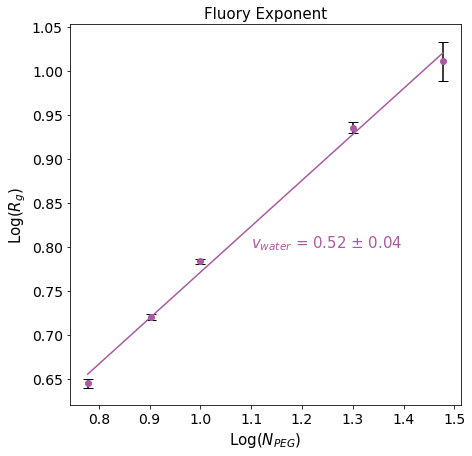

In [264]:
plt.figure(figsize=(7,7))
plt.errorbar(np.log10(n_peg), np.log10(rg_npeg), yerr=rg_npeg_std, color='#A95AA1', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(np.log10(n_peg), gg, color='#A95AA1')
plt.title(r'Fluory Exponent', fontsize=15)
plt.xlabel(r'Log($N_{PEG}$)', fontsize=15)
plt.ylabel(r'Log($R_{g}$)', fontsize=15)
plt.tick_params(labelsize=14)
plt.text(1.1, 0.80, r'$v_{water}$ = 0.52 ± 0.04', fontsize=15, color='#A95AA1')